In [208]:
# Imports
import numpy as np 
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [209]:
# Each row is a training example, each column is a feature  [X1, X2, X3]
#X=np.array(([58,1.3],[34,1.3],[58,.3],[15,.1]), dtype=float)

#y=np.array(([166],[100],[100],[5]), dtype=float)

# assume features are soil moisture and soil grain size [58,1.3] = 58% soil moisture and 1.3mm grain size
# and training data is co2 flux [units aren't important for this example]
# First "training" set only has moist soils - smaller grain size makes it harder for roots to access water
X=np.array(([58,1.3],[34,1.3],[58,.3]), dtype=float)
y=np.array(([166],[100],[100]), dtype=float)

# Need to normalize data (transform the data between 0 and 1)
scaler_x = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler_y = preprocessing.MinMaxScaler(feature_range=(0, 1))
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

# Define useful functions    

# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1-np.tanh(x)**2

def relu(X):
    return np.maximum(0,X)

def relu_prime(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

# Class definition
class NeuralNetwork:
    def __init__(self, x,y):
        self.input = x
        self.weights1= np.random.rand(self.input.shape[1],4) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2
        
    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, 2*(self.y -self.output)*sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input.T, np.dot(2*(self.y -self.output)*sigmoid_derivative(self.output), self.weights2.T)*sigmoid_derivative(self.layer1))
    
        self.weights1 += d_weights1
        self.weights2 += d_weights2

    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()
        
    def test(self,new_input):
        self.layer1 = sigmoid(np.dot(new_input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2

NN = NeuralNetwork(X,y)
for i in range(1500): # trains the NN 1,000 times
    if i % 100 ==0: 
        print ("for iteration # " + str(i) + "\n")
        print ("Input : \n" + str(scaler_x.inverse_transform(X)))
        print ("Actual Output: \n" + str(scaler_y.inverse_transform(y)))
        print ("Predicted Output: \n" + str(scaler_y.inverse_transform(NN.feedforward())))
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        print ("\n")
        
    NN.train(X, y)

for iteration # 0

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]]
Actual Output: 
[[166.]
 [100.]
 [100.]]
Predicted Output: 
[[155.12476017]
 [152.08362348]
 [153.63848873]]
Loss: 
0.436796919980541


for iteration # 100

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]]
Actual Output: 
[[166.]
 [100.]
 [100.]]
Predicted Output: 
[[129.45188043]
 [121.94890727]
 [122.84175326]]
Loss: 
0.17900713699456752


for iteration # 200

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]]
Actual Output: 
[[166.]
 [100.]
 [100.]]
Predicted Output: 
[[150.04440239]
 [112.21517071]
 [110.8861035 ]]
Loss: 
0.03996776402175004


for iteration # 300

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]]
Actual Output: 
[[166.]
 [100.]
 [100.]]
Predicted Output: 
[[158.31832833]
 [106.21741079]
 [105.40839506]]
Loss: 
0.009711892692344086


for iteration # 400

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]]
Actual Output: 
[[166.]
 [100.]
 [100.]]
Predicted Output: 
[[160.92170553]
 [104.15215154]
 [103.604

In [210]:
# save predicted values
pred = scaler_y.inverse_transform(NN.feedforward())

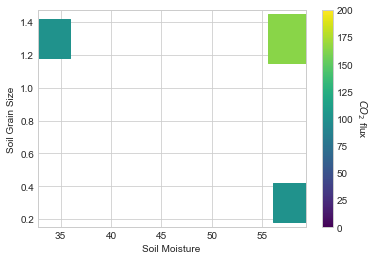

In [211]:
# Scatter Plot of features and predictions
X_orig = scaler_x.inverse_transform(X)
plt.scatter(X_orig[:,0], X_orig[:,1], alpha=1,
            s=15*pred, c=pred[:,0],  cmap='viridis',marker ='s')
plt.xlabel('Soil Moisture')
plt.ylabel('Soil Grain Size');
plt.clim(0, 200)
cbar = plt.colorbar()  # show color scale
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$CO_{2}$ flux', rotation=270);


In [212]:
# Testing out of sample "locations"

X_test=np.array(([22,.7],[80,2.3],[40,.3],[15,.1],[2,.1]), dtype=float)
# Need to normalize data (transform the data between 0 and 1)
X_test= scaler_x.transform(X_test)
# Need to back transform results using original transformation settings
scaler_test = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler_test.min_,scaler_test.scale_ = scaler_y.min_[0],scaler_y.scale_[0]
# Test model
pred_test = scaler_test.inverse_transform(NN.test(X_test))
print ("Predicted Output: \n" + str(pred_test))


Predicted Output: 
[[100.07520635]
 [165.71861341]
 [100.49425584]
 [100.00064233]
 [100.0016063 ]]


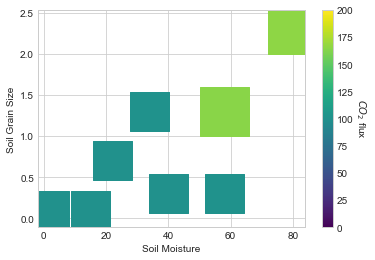

In [213]:
# Scatter Plot of features and predictions
X_all = scaler_x.inverse_transform(np.concatenate((X,X_test), axis=0))
pred_all = np.concatenate((pred,pred_test), axis=0)
plt.scatter(X_all[:,0], X_all[:,1], alpha=1,
            s=15*pred_all, c=pred_all[:,0],  cmap='viridis',marker ='s')
plt.xlabel('Soil Moisture')
plt.ylabel('Soil Grain Size');
plt.clim(0, 200)
cbar = plt.colorbar();  # show color scale
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$CO_{2}$ flux', rotation=270);


In [214]:
# In second "training" set we now have a very dry sample with very small soil grains 
# (think desert) which we see greatly reduced co2 flux

# Each row is a training example, each column is a feature  [X1, X2, X3]
X=np.array(([58,1.3],[34,1.3],[58,.3],[15,.1]), dtype=float)
y=np.array(([166],[100],[100],[5]), dtype=float)


# Need to normalize data (transform the data between 0 and 1)
scaler_x = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler_y = preprocessing.MinMaxScaler(feature_range=(0, 1))
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

NN = NeuralNetwork(X,y)
for i in range(1500): # trains the NN 1,000 times
    if i % 100 ==0: 
        print ("for iteration # " + str(i) + "\n")
        print ("Input : \n" + str(scaler_x.inverse_transform(X)))
        print ("Actual Output: \n" + str(scaler_y.inverse_transform(y)))
        print ("Predicted Output: \n" + str(scaler_y.inverse_transform(NN.feedforward())))
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        print ("\n")
        
    NN.train(X, y)
    
    
X_test=np.array(([22,.7],[80,2.3],[40,.3],[15,.1],[2,.1]), dtype=float)
X_test= scaler_x.transform(X_test)
scaler_test = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler_test.min_,scaler_test.scale_ = scaler_y.min_[0],scaler_y.scale_[0]
scaler_test.inverse_transform(NN.test(X_test))


for iteration # 0

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]
 [15.   0.1]]
Actual Output: 
[[166.]
 [100.]
 [100.]
 [  5.]]
Predicted Output: 
[[127.42190331]
 [124.9604158 ]
 [122.09061474]
 [114.56148814]]
Loss: 
0.14084146873163486


for iteration # 100

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]
 [15.   0.1]]
Actual Output: 
[[166.]
 [100.]
 [100.]
 [  5.]]
Predicted Output: 
[[129.06277789]
 [114.13573363]
 [107.72148796]
 [ 29.86615289]]
Loss: 
0.02162459278618783


for iteration # 200

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]
 [15.   0.1]]
Actual Output: 
[[166.]
 [100.]
 [100.]
 [  5.]]
Predicted Output: 
[[136.8830688 ]
 [111.06890164]
 [106.46891636]
 [ 17.08699291]]
Loss: 
0.01117104415956404


for iteration # 300

Input : 
[[58.   1.3]
 [34.   1.3]
 [58.   0.3]
 [15.   0.1]]
Actual Output: 
[[166.]
 [100.]
 [100.]
 [  5.]]
Predicted Output: 
[[140.76463554]
 [108.51874115]
 [105.68439706]
 [ 12.83931094]]
Loss: 
0.007746226381201975


for iteration # 400



array([[ 24.79766025],
       [164.36662482],
       [ 52.01804761],
       [  6.89232387],
       [  5.36283473]])

In [215]:
# save predicted values
pred_2 = scaler_y.inverse_transform(NN.feedforward())

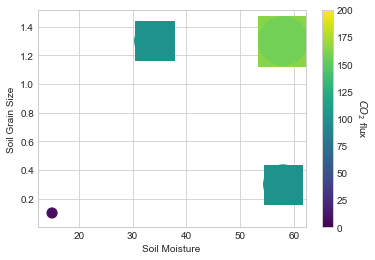

In [221]:
# Scatter Plot of features and predictions
X_orig_2 = scaler_x.inverse_transform(X)
plt.scatter(X_orig[:,0], X_orig[:,1], alpha=1,
            s=15*pred, c=pred[:,0],  cmap='viridis',marker ='s')
plt.clim(0, 200)
plt.scatter(X_orig_2[:,0], X_orig_2[:,1], alpha=1,
            s=15*pred_2, c=pred_2[:,0],  cmap='viridis',marker ='o')

plt.xlabel('Soil Moisture')
plt.ylabel('Soil Grain Size');
plt.clim(0, 200)
cbar = plt.colorbar()  # show color scale
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$CO_{2}$ flux', rotation=270);

In [205]:
# Testing out of sample "locations"

X_test=np.array(([22,.7],[80,2.3],[40,.3],[15,.1],[2,.1]), dtype=float)
# Need to normalize data (transform the data between 0 and 1)
X_test= scaler_x.transform(X_test)
# Need to back transform results using original transformation settings
scaler_test = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler_test.min_,scaler_test.scale_ = scaler_y.min_[0],scaler_y.scale_[0]
# Test model
pred_test_2 = scaler_test.inverse_transform(NN.test(X_test))

print ("Predicted Output: \n" + str(pred_test_2))

Predicted Output: 
[[ 28.72736406]
 [164.26985284]
 [ 64.14928851]
 [  7.13737765]
 [  5.3493369 ]]


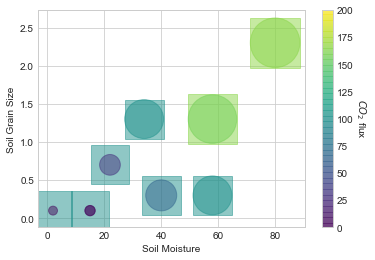

In [222]:
# Scatter Plot of features and predictions
X_all_2 = scaler_x.inverse_transform(np.concatenate((X,X_test), axis=0))
pred_all_2 = np.concatenate((pred_2,pred_test_2), axis=0)
plt.scatter(X_all[:,0], X_all[:,1], alpha=0.5,
            s=15*pred_all, c=pred_all[:,0],  cmap='viridis',marker ='s')
plt.clim(0, 200)

plt.scatter(X_all_2[:,0], X_all_2[:,1], alpha=0.5,
            s=15*pred_all_2, c=pred_all_2[:,0],  cmap='viridis',marker ='o')
plt.xlabel('Soil Moisture')
plt.ylabel('Soil Grain Size');
plt.clim(0, 200)
cbar = plt.colorbar();  # show color scale
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$CO_{2}$ flux', rotation=270);